# Decision Tree for Record Data

## Introduction of DT

The decision tree is an attribute structure. Each leaf node of the decision tree represents a feature of the attribute set. Each branch is classified based on the size or category of a feature. The final result, that is, the final leaf node is a label classification, label classification.


Decision tree has several classification algorithms according to different classification methods. ID3 algorithm is a kind of decision tree, which is based on Occam's razor principle, that is, to do more with as few things as possible. The goal of each layer classification is to maximize the information gain, and the classification criteria of each layer are designed for this goal. C4.5 decision tree is optimized based on ID3 decision tree. Replacing the node division criteria with the information gain rate can handle continuous values, missing values, and pruning operations.


The pruning of decision trees is to reduce the complexity of decision trees and improve the generalization performance of decision trees. The generalization ability of the model can be reflected from the performance of the verification set.

# Preparations

**import python packages and read data from csv file**

In [130]:
#LOAD RELEVANT PACKAGES
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [133]:
df=pd.read_csv("travel_mode_choice.csv")

In [135]:
df.head()

,TTME,INVC,INVT,GC,HINC,PSIZE,choice
0,40,20,345,57,20,1,2
1,45,148,115,160,45,1,1
2,20,19,325,55,26,1,2
3,15,38,255,66,26,1,2
4,20,21,300,54,6,1,2


This data is aboat people's travel mode choice and it contains 151 lines. There are 3 different travel mode choice in this data: "1" represents for air, "2" for train, and "3" for bus. As for X variables (features), there are 6 variables in total interpreted below: \

TTME - terminal waiting time\
INVC - in vehicle cost for all stages\
INVT - travel time (in-vehicle time) for all stages\
GC - generalized cost measure:invc+(invt*value of travel time savings)\
HINC - household income\
PSIZE - traveling group size\

The goal of this decision tree model is to precisely predict people's travel mode choice according to those X variables.


## Data exploration

First, let's have a look at the distribution of the target variable: choice

In [136]:
df["choice"].value_counts()

2    63
1    58
3    30
Name: choice, dtype: int64

In [138]:
X=df.loc[:,df.columns!="choice"]
Y=df.loc[:,"choice"]

Then I plot the heat map of the correlation matrix to see the relationship among different variables.

            TTME      INVC      INVT        GC      HINC    PSIZE     choice
TTME    1.000000  0.464165 -0.152421  0.309941  0.142177  0.070189 -0.384252
INVC    0.464165  1.000000 -0.429092  0.550372  0.362047 -0.040891 -0.693269
INVT   -0.152421 -0.429092  1.000000  0.484061 -0.241788 -0.045246  0.678051
GC      0.309941  0.550372  0.484061  1.000000  0.131839  0.079697 -0.057761
HINC    0.142177  0.362047 -0.241788  0.131839  1.000000 -0.017023 -0.294000
PSIZE   0.070189 -0.040891 -0.045246  0.079697 -0.017023  1.000000 -0.078319
choice -0.384252 -0.693269  0.678051 -0.057761 -0.294000 -0.078319  1.000000


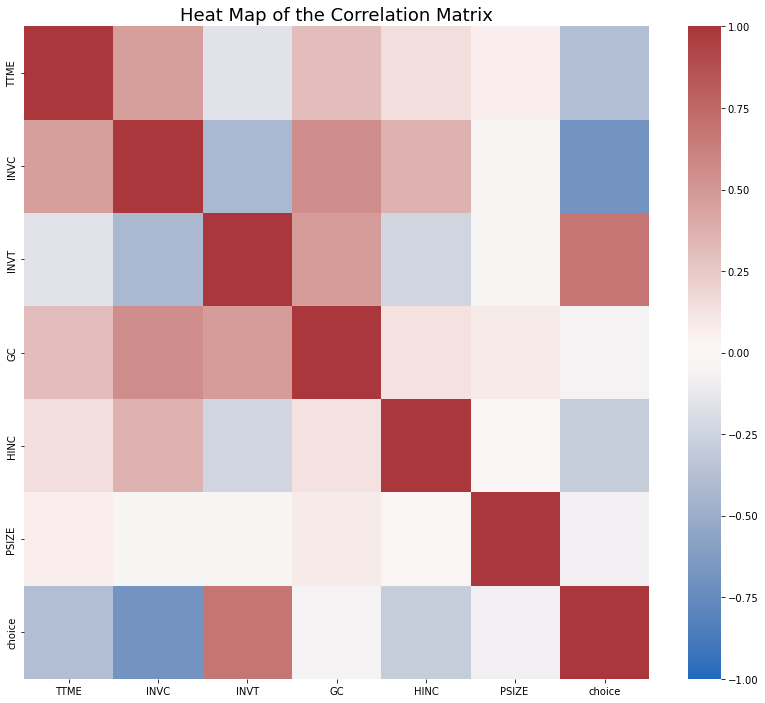

In [139]:
print(df.corr())
fig,axes = plt.subplots(1, 1, num="stars",figsize=(14, 12))
axes = sns.heatmap(df.corr(), vmin=-1, vmax=1,cmap="vlag")
axes.set_title("Heat Map of the Correlation Matrix", fontsize=18)
#plt.show()
plt.savefig("correlation.png",dpi=200)

## Data modeling
In data modeling part, we need to split the data first. Ratio of test data set is 0.2.

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
print(type(X_train),X_train.shape)
print(type(Y_train),Y_train.shape)
print(type(X_test),X_test.shape)
print(type(Y_test),Y_test.shape)

<class 'pandas.core.frame.DataFrame'> (120, 6)
<class 'pandas.core.series.Series'> (120,)
<class 'pandas.core.frame.DataFrame'> (31, 6)
<class 'pandas.core.series.Series'> (31,)


Then it's time to use decision tree model to fit the train data. We first use default hyperparameters.

In [158]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train,Y_train)
yp_train = model.predict(X_train)
yp_test = model.predict(X_test)

In [153]:
def confusion_plot(y_data,y_pred):
    print("ACCURACY:",sum(y_pred==y_data)/len(y_data))
#     print("NEGATIVE RECALL (Y=0):",sum((y_pred==0)&(y_data==0))/sum(y_data==0))
#     print("NEGATIVE PRECISION (Y=0):",sum((y_pred==0)&(y_data==0))/sum(y_pred==0))
#     print("POSITIVE RECALL (Y=1):",sum((y_pred==1)&(y_data==1))/sum(y_data==1))
#     print("POSITIVE PRECISION (Y=1):",sum((y_pred==1)&(y_data==1))/sum(y_pred==1))
    con_matrix=confusion_matrix(y_data,y_pred,labels=model.classes_)
    print(con_matrix)
    disp=ConfusionMatrixDisplay(confusion_matrix=con_matrix,display_labels=model.classes_)
    disp.plot()
    plt.show()

------TRAINING------
ACCURACY: 1.0
[[45  0  0]
 [ 0 51  0]
 [ 0  0 24]]


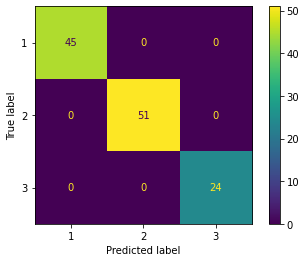

------TEST------
ACCURACY: 0.7096774193548387
[[10  2  1]
 [ 0 11  1]
 [ 0  5  1]]


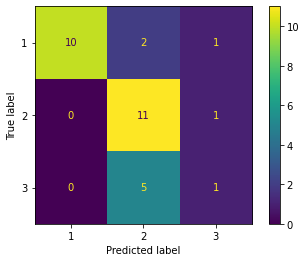

In [159]:
print("------TRAINING------")
confusion_plot(Y_train,yp_train)
print("------TEST------")
confusion_plot(Y_test,yp_test)

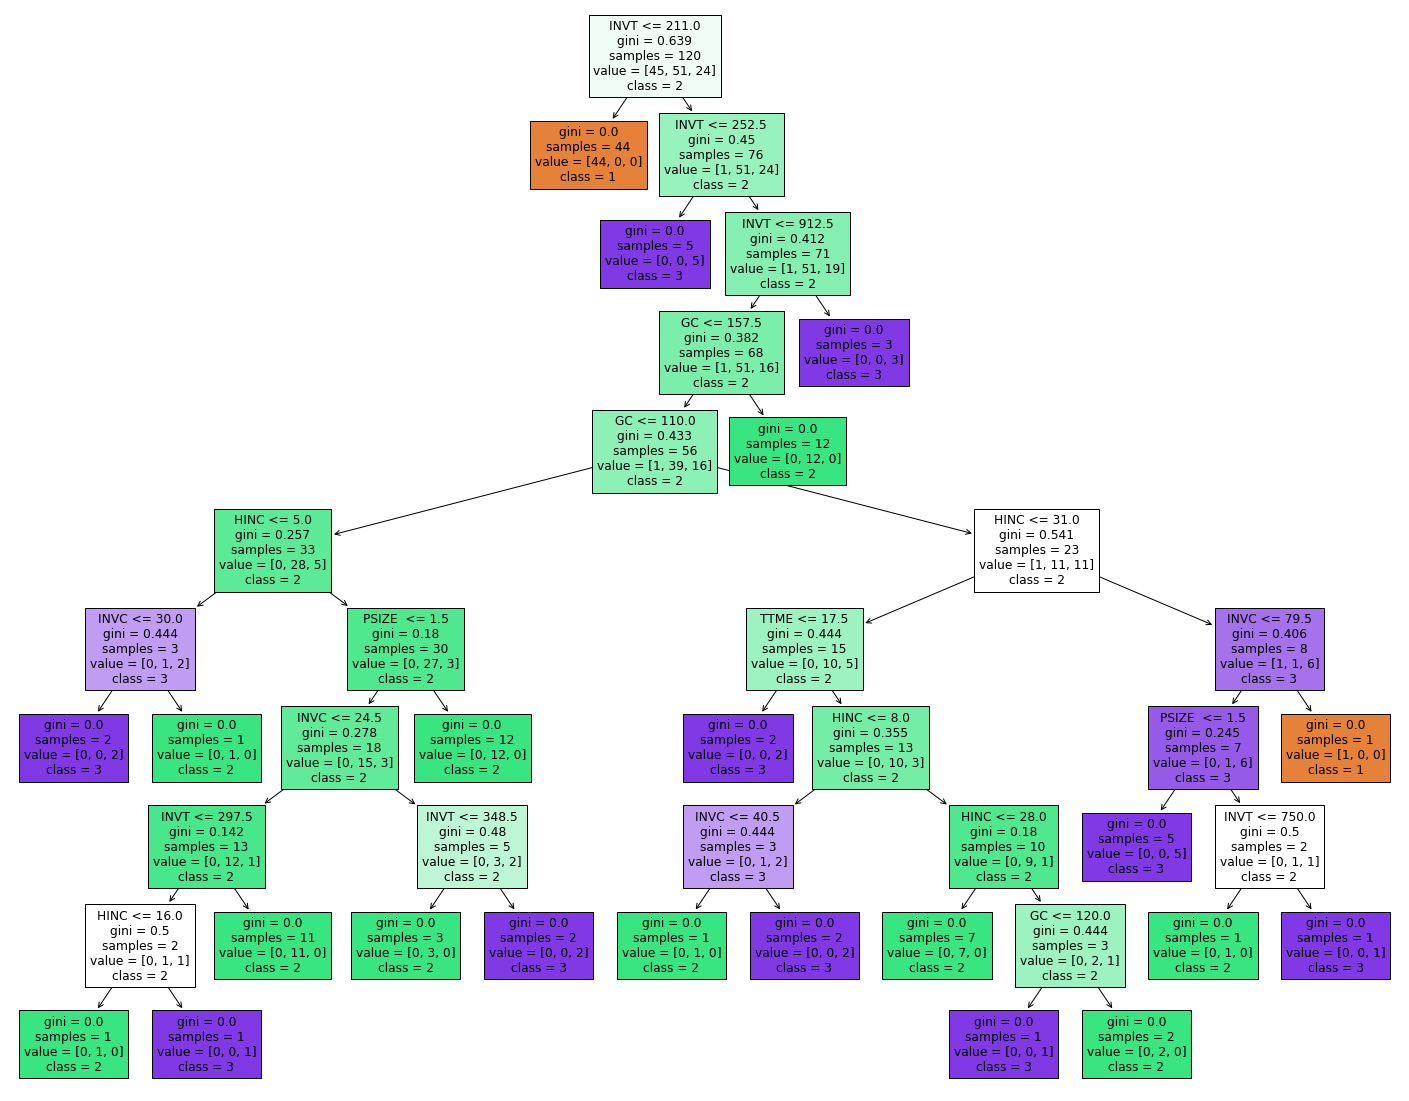

In [155]:
def plot_tree(model,X,Y):
    fig=plt.figure(figsize=(25,20))
    _=tree.plot_tree(model,
                   feature_names=X_train.columns,
                   class_names=["1","2","3"],
                   filled=True)
    plt.show()
    
plot_tree(model,X_train,Y_train)

In [166]:
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(X_train,Y_train)

    yp_train=model.predict(X_train)
    yp_test=model.predict(X_test)

    test_results.append([num_layer,accuracy_score(Y_test, yp_test)])
    train_results.append([num_layer,accuracy_score(Y_train, yp_train)])

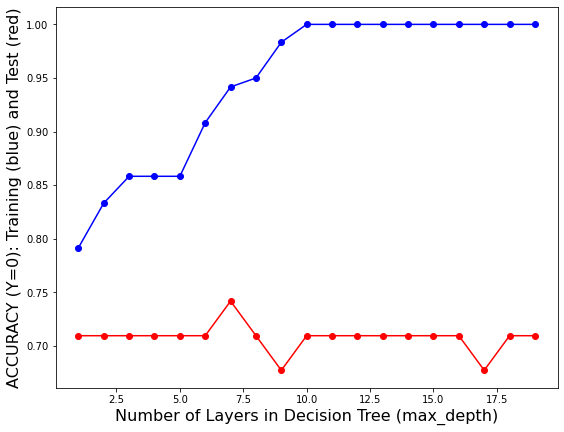

In [167]:
fig,axes=plt.subplots(1,1,figsize=(9,7))
fs=16
axes.plot(np.array(train_results)[:,0],np.array(train_results)[:,1],"b-o")
axes.plot(np.array(test_results)[:,0],np.array(test_results)[:,1],"r-o")
axes.set_xlabel("Number of Layers in Decision Tree (max_depth)", fontsize=fs)
axes.set_ylabel("ACCURACY (Y=0): Training (blue) and Test (red)", fontsize=fs)

plt.show()

In [169]:
criterion_list=["gini", "entropy", "log_loss"]

In [127]:
model = tree.DecisionTreeClassifier(max_depth=7)
model = model.fit(X_train,Y_train)

yp_train=model.predict(X_train)
yp_test=model.predict(X_test)

------TRAINING------
ACCURACY: 0.9
[[46  0  0]
 [ 0 43  8]
 [ 0  4 19]]


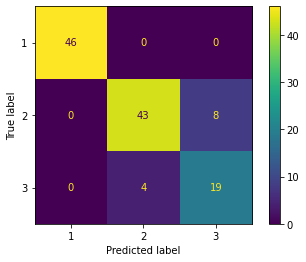

------TEST------
ACCURACY: 0.8709677419354839
[[12  0  0]
 [ 0  9  3]
 [ 0  1  6]]


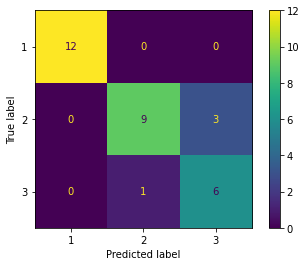

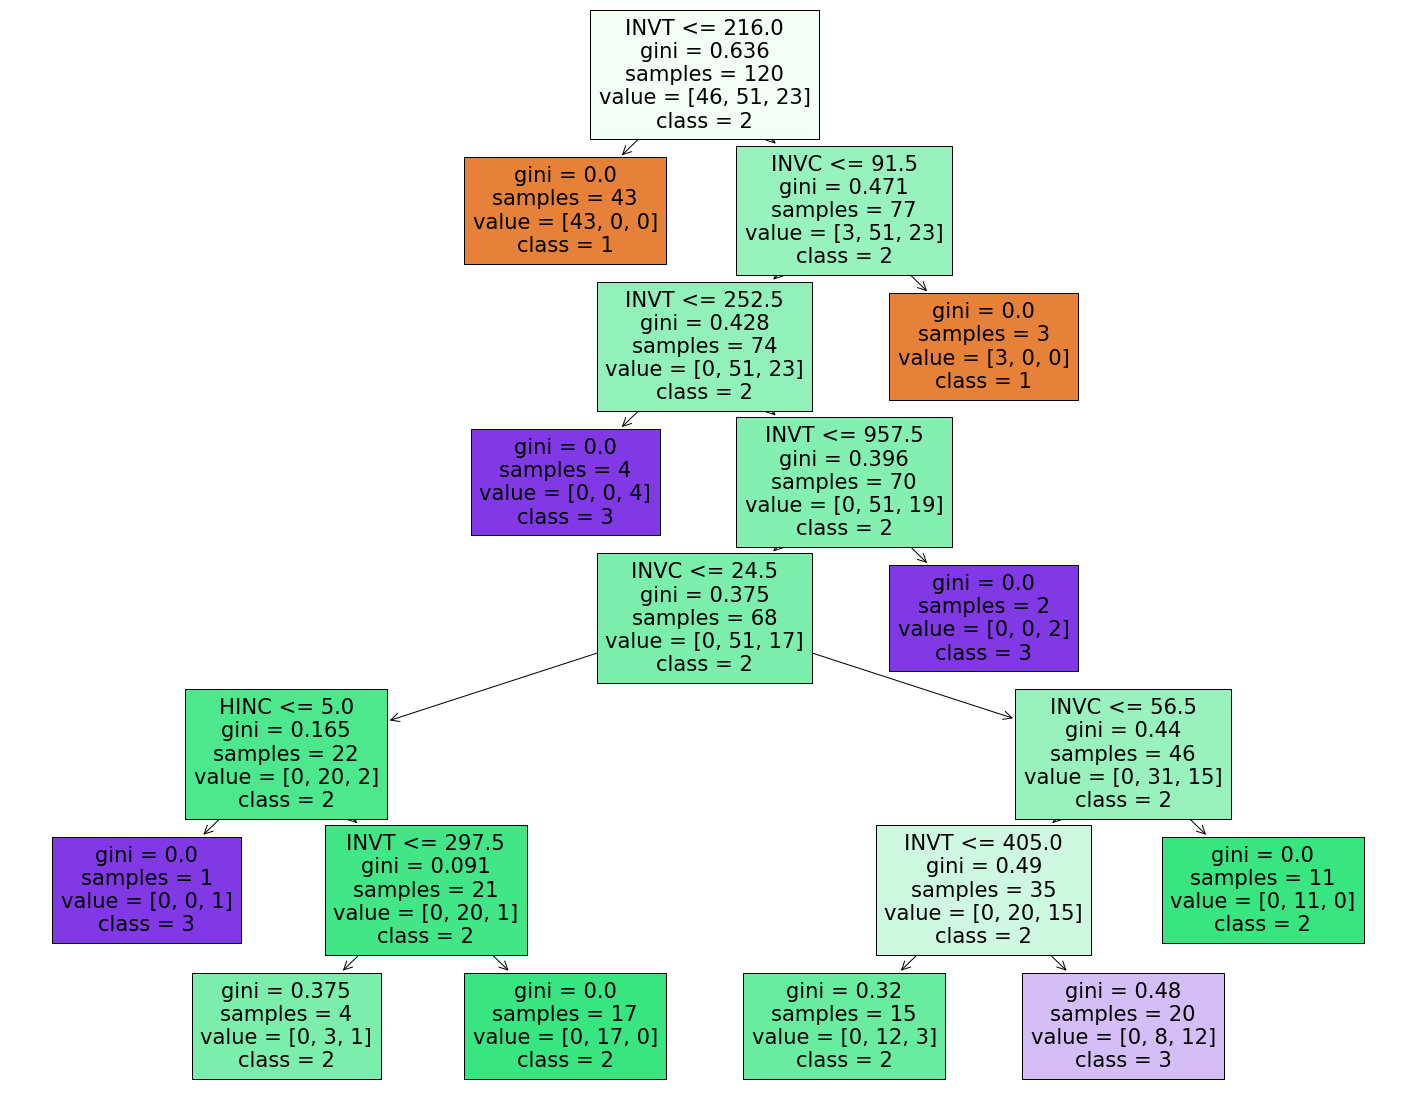

In [128]:
print("------TRAINING------")
confusion_plot(Y_train,yp_train)
print("------TEST------")
confusion_plot(Y_test,yp_test)

plot_tree(model,X_train,Y_train)